Boston Data의 기초통계량

In [ ]:
import pandas as pd

# Boston 데이터셋 로드
boston_data = pd.read_csv('Boston.csv')

# 데이터의 기초 통계량 파악
boston_statistics = boston_data.describe()

# 결과 출력
print("Boston 데이터셋의 기초 통계량:")
print(boston_statistics)



Boston 데이터셋의 기초 통계량:
           TOWNNO        TRACT         LON         LAT        MEDV  \
count  506.000000   506.000000  506.000000  506.000000  506.000000   
mean    47.531621  2700.355731  -71.056389   42.216440   22.532806   
std     27.571401  1380.036830    0.075405    0.061777    9.197104   
min      0.000000     1.000000  -71.289500   42.030000    5.000000   
25%     26.250000  1303.250000  -71.093225   42.180775   17.025000   
50%     42.000000  3393.500000  -71.052900   42.218100   21.200000   
75%     78.000000  3739.750000  -71.019625   42.252250   25.000000   
max     91.000000  5082.000000  -70.810000   42.381000   50.000000   

            CMEDV        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    3.613524   11.363636   11.136779    0.069170    0.554695   
std      9.182176    8.601545   23.322453    6.860353    0.253994    0.115878   
min      5.000000    0.0

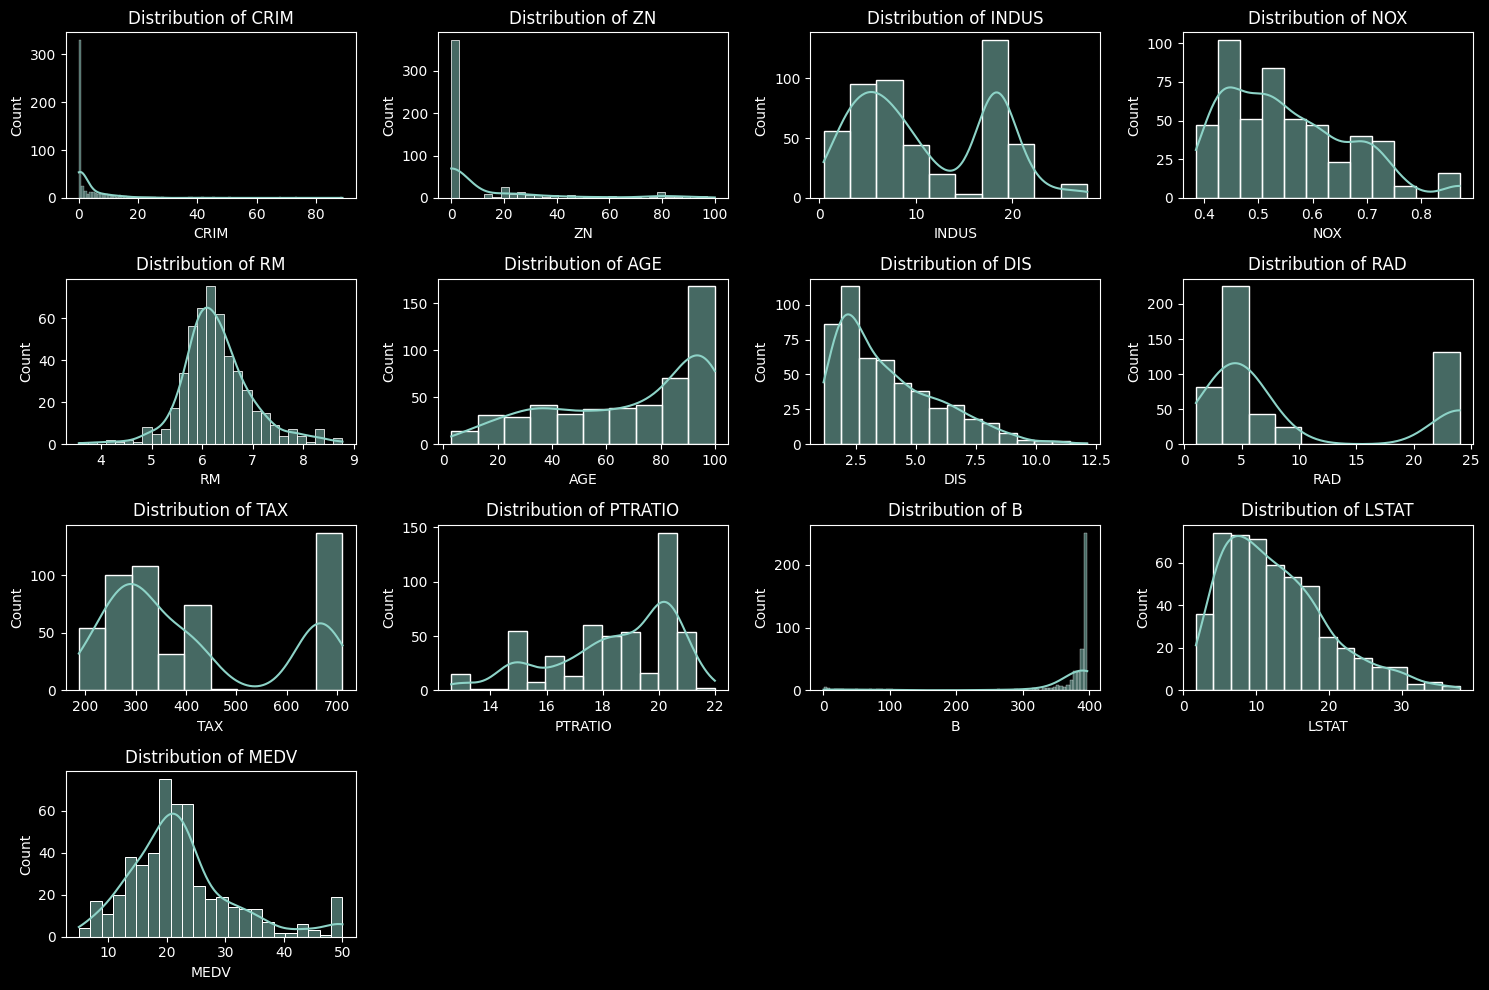

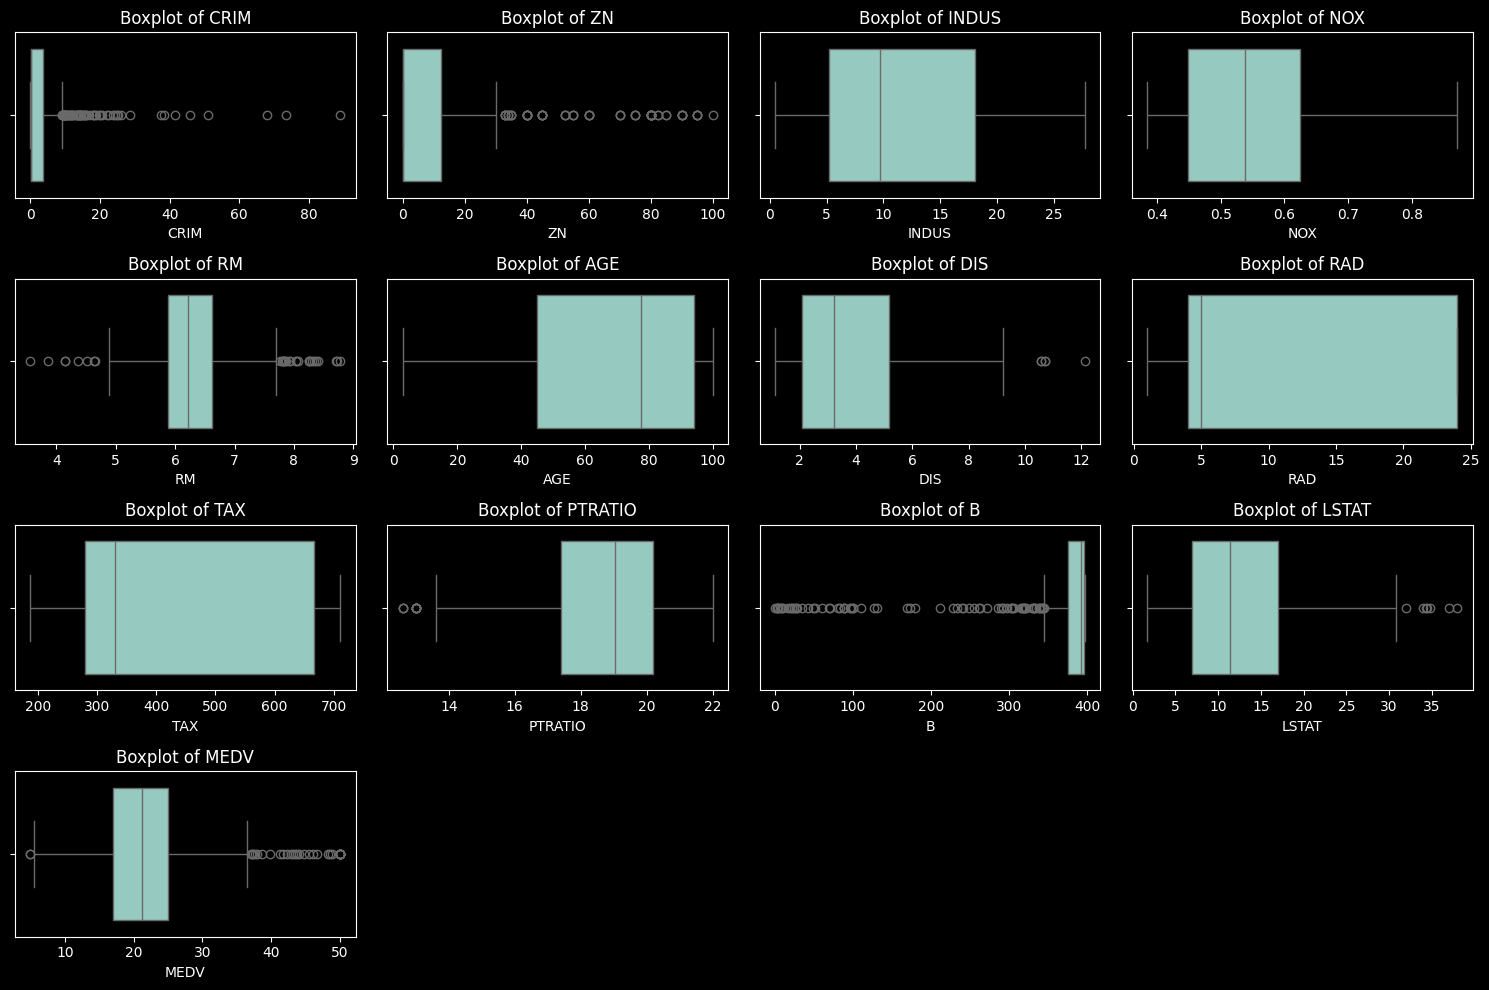

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
boston_data = pd.read_csv('Boston.csv')

# 주요 변수 선택
selected_features = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# 히스토그램 그리기
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(boston_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 박스플롯 그리기
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=boston_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


3. Using the Boston data set, fit classification models in order to predict whether a given census tract has a crime rate above or below the median.
Explore logistic regression, LDA, and QDA methods using various subsets of the predictors. Describe your findings.
Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.

In [4]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# 데이터 로드 및 전처리
boston_data = pd.read_csv('Boston.csv')

# 반응 변수 생성: CRIM(범죄율)이 중앙값 이상이면 1, 아니면 0
median_crim = boston_data['CRIM'].median()
boston_data['HighCrime'] = (boston_data['CRIM'] > median_crim).astype(int)

# 예측 변수 및 반응 변수 설정
predictors = ["ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
X = boston_data[predictors]
y = boston_data['HighCrime']

# 데이터 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# (a) Logistic Regression
log_reg = LogisticRegression(max_iter=200, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log)
print("Logistic Regression Accuracy:", accuracy_log)

# (b) LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("\nLDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Accuracy:", accuracy_lda)

# (c) QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("\nQDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA Accuracy:", accuracy_qda)


Logistic Regression Confusion Matrix:
 [[68  7]
 [16 61]]
Logistic Regression Accuracy: 0.8486842105263158

LDA Confusion Matrix:
 [[71  4]
 [19 58]]
LDA Accuracy: 0.8486842105263158

QDA Confusion Matrix:
 [[74  1]
 [15 62]]
QDA Accuracy: 0.8947368421052632
